In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Reading the dataset
df = pd.read_csv('Train.csv')

In [3]:
#Showing first five columns in the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#Checking the Null Values in the every column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Text(0.5, 0, 'Statisical Measurements')

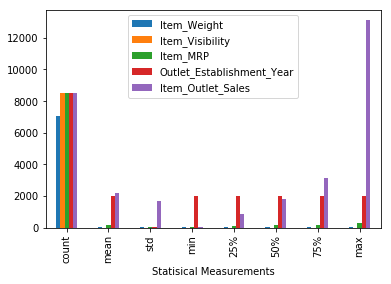

In [12]:
#Statisical measurments checking 
df_stats = df.describe()

df_stats.plot.bar()
plt.xlabel('Statisical Measurements')

# Imputation - the cols Item Weight and Outlet size have Null values
Impute Item_weight with mean() and outlet_Size = ' small ' if outlet location type is ='Tier 2'and with mode "High', Medium) if outlet_location_Type = 'Tier3'

In [13]:
# Imputing Item_Weight
df.Item_Weight = df.Item_Weight.fillna(value=np.mean(df.Item_Weight,axis = 0))

In [14]:
# Imputing Outler_Size when Outler_Location_Type == 'Tier 3'
for i in range(0,len(df.Outlet_Size)):
    if (df.Outlet_Size.isnull()[i]):
            df.Outlet_Size[i] = 'Medium'

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df.Item_Fat_Content = df.Item_Fat_Content.replace({'Low Fat':'LF','Regular' : 'reg', 'low fat': 'LF'})

In [17]:
df.Item_Fat_Content.value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

1 Droppig the Columns : Item_Identifier,Item_Type,Outlet_Identifier

2 Label encode and OHE the following columns : Item_Fat_Content, Outlet_Size ,Outlet_Location_Type,Outlet_Type

3 Then Check describe, correlation, covariance,

4 multicollinearity, 

5 build ols, check summary, check diagnostic plots, 

6 check normality assumption shapiro, check outliers/Influential values/cook's D,

7 Stepwise AIC will give u good features - Feature Extraction

8 Take the best p-value variables from stepwise AIC and Build OLS again

In [18]:
df = df.drop(['Item_Identifier','Item_Type','Outlet_Identifier'],axis = 1)

In [19]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,LF,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,reg,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,LF,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,reg,0.000000,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,LF,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

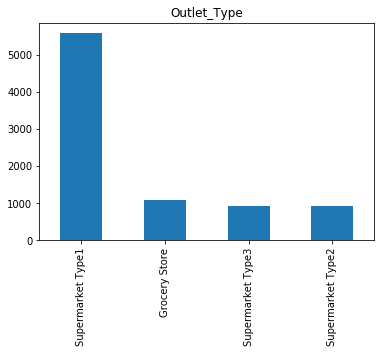

In [46]:
df.Outlet_Type.value_counts().plot(kind='bar',title='Outlet_Type')



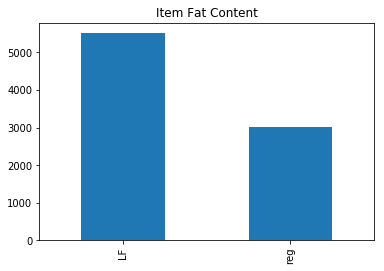

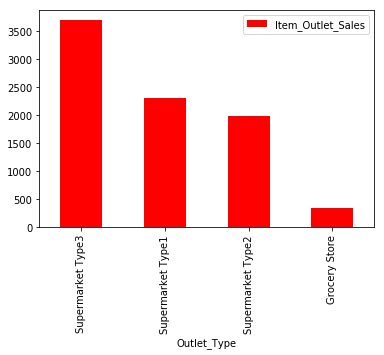

In [47]:
df.Item_Fat_Content.value_counts().plot(kind='bar',title='Item Fat Content')
df.groupby('Outlet_Type')[['Outlet_Type','Item_Outlet_Sales']].mean().sort_values(ascending=False,
                                                            by='Item_Outlet_Sales').plot(kind='bar',color='r')



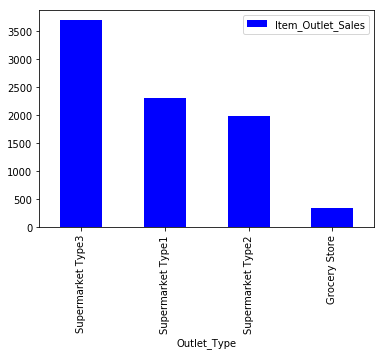

In [48]:
df.groupby('Outlet_Type')[['Outlet_Type','Item_Outlet_Sales']].mean().sort_values(ascending=False,
                                                            by='Item_Outlet_Sales').plot(kind='bar',color='b')

In [49]:
df.to_excel('train.xlsx')

### LabelEncoding and OneHotEncoding

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
# Labelencode and onehotencode
#step1 = labelencoder
le= LabelEncoder()
df_IFC = pd.DataFrame(le.fit_transform(df.Item_Fat_Content),columns=['ItemFatContent'])
df_IFC.head()
df_OS = pd.DataFrame(le.fit_transform(df.Outlet_Size),columns=['OutletSize'])
df_OS.head()
df_OLS = pd.DataFrame(le.fit_transform(df.Outlet_Location_Type),columns=['OutletLocationType'])
df_OLS.head()
df_OT = pd.DataFrame(le.fit_transform(df.Outlet_Type),columns=['OutletType'])
df_OT.head()

df_le=pd.concat([df_IFC,df_OS,df_OLS,df_OT],axis=1)
df_le.head()

,ItemFatContent,OutletSize,OutletLocationType,OutletType
0,0,1,0,1
1,1,1,2,2
2,0,1,0,1
3,1,1,2,0
4,0,0,2,1


In [23]:
#step2 - Onehotencoder
#This step creates dummy variables of the label encoded varaibles
#ItemFatContent - uniform =1 and favorite = 0
#OutletSize - uniform = 1 and favorite = 0
ohe = OneHotEncoder()
df_le_ohe = pd.DataFrame(ohe.fit_transform(df_le).toarray().astype(np.int64),
            columns=['ItemFatContent_LF','ItemFatContent_reg','OutletSize_small','OutletSize_medium','OutletSize_high','OutletLocationType_Tier1','OutletLocationType_Tier2','OutletLocationType_Tier3','OutletType_ST1','OutletType_ST2','OutletType_ST3','OutletType_GS'])
df_le_ohe.head()

,ItemFatContent_LF,ItemFatContent_reg,OutletSize_small,OutletSize_medium,OutletSize_high,OutletLocationType_Tier1,OutletLocationType_Tier2,OutletLocationType_Tier3,OutletType_ST1,OutletType_ST2,OutletType_ST3,OutletType_GS
0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1,0,0
3,0,1,0,1,0,0,0,1,1,0,0,0
4,1,0,1,0,0,0,0,1,0,1,0,0


In [25]:
df_cleanedpart = pd.concat([df,df_le_ohe], axis=1).drop(['Item_Fat_Content', 'Outlet_Size' ,'Outlet_Location_Type','Outlet_Type'], axis =1)

df_cleanedpart.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ItemFatContent_LF,ItemFatContent_reg,OutletSize_small,OutletSize_medium,OutletSize_high,OutletLocationType_Tier1,OutletLocationType_Tier2,OutletLocationType_Tier3,OutletType_ST1,OutletType_ST2,OutletType_ST3,OutletType_GS
0,9.300000,0.016047,249.8092,1999,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,48.2692,2009,443.4228,0,1,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,141.6180,1999,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0
3,19.200000,0.000000,182.0950,1998,732.3800,0,1,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,53.8614,1987,994.7052,1,0,1,0,0,0,0,1,0,1,0,0
5,10.395000,0.000000,51.4008,2009,556.6088,0,1,0,1,0,0,0,1,0,0,1,0
6,13.650000,0.012741,57.6588,1987,343.5528,0,1,1,0,0,0,0,1,0,1,0,0
7,12.857645,0.127470,107.7622,1985,4022.7636,1,0,0,1,0,0,0,1,0,0,0,1
8,16.200000,0.016687,96.9726,2002,1076.5986,0,1,0,1,0,0,1,0,0,1,0,0
9,19.200000,0.094450,187.8214,2007,4710.5350,0,1,0,1,0,0,1,0,0,1,0,0


In [26]:
df_cleanedpart.shape

(8523, 17)

In [29]:
df_cleanedpart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ItemFatContent_LF,ItemFatContent_reg,OutletSize_small,OutletSize_medium,OutletSize_high,OutletLocationType_Tier1,OutletLocationType_Tier2,OutletLocationType_Tier3,OutletType_ST1,OutletType_ST2,OutletType_ST3,OutletType_GS
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,0.647307,0.352693,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.051598,62.275067,8.371760,1706.499616,0.477836,0.477836,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_cleanedpart.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
ItemFatContent_LF              int64
ItemFatContent_reg             int64
OutletSize_small               int64
OutletSize_medium              int64
OutletSize_high                int64
OutletLocationType_Tier1       int64
OutletLocationType_Tier2       int64
OutletLocationType_Tier3       int64
OutletType_ST1                 int64
OutletType_ST2                 int64
OutletType_ST3                 int64
OutletType_GS                  int64
dtype: object

In [32]:
corr = df_cleanedpart.corr()

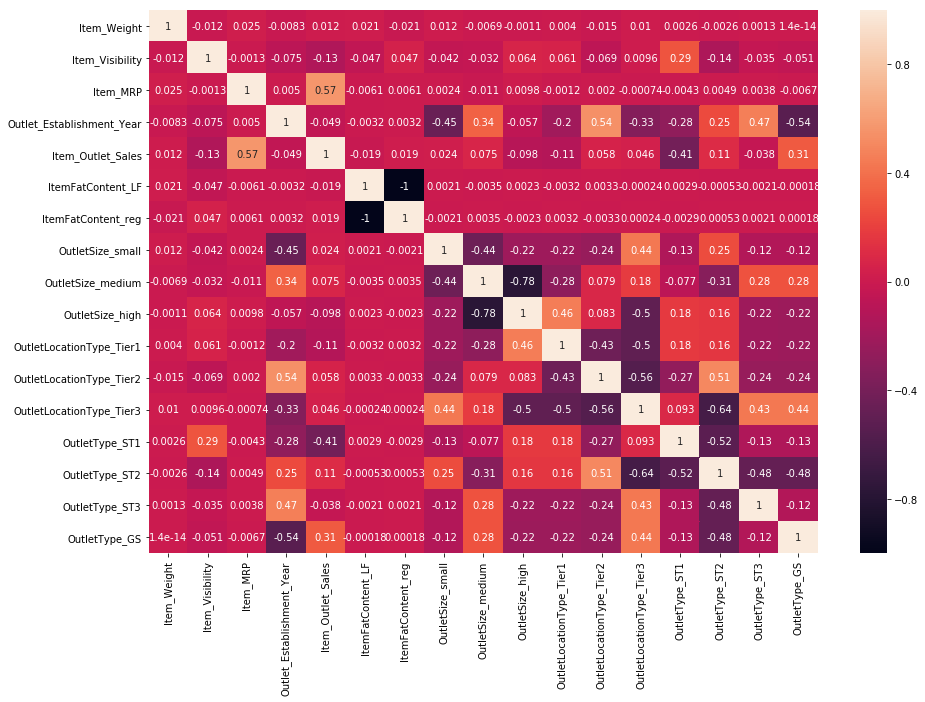

In [37]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot = True)

In [26]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import lmdiag

In [28]:
df_cleanedpart.keys()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'ItemFatContent_LF',
       'ItemFatContent_reg', 'OutletSize_small', 'OutletSize_medium',
       'OutletSize_high', 'OutletLocationType_Tier1',
       'OutletLocationType_Tier2', 'OutletLocationType_Tier3',
       'OutletType_ST1', 'OutletType_ST2', 'OutletType_ST3', 'OutletType_GS'],
      dtype='object')

In [31]:
model = sfa.ols(formula= 'Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP+Outlet_Establishment_Year+ItemFatContent_LF+ItemFatContent_reg+OutletSize_small+OutletSize_medium+OutletSize_high+OutletLocationType_Tier1+OutletLocationType_Tier2+OutletLocationType_Tier3+OutletType_ST1+OutletType_ST2+OutletType_ST3+OutletType_GS',
   data = df_cleanedpart).fit()

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     914.3
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:17:18   Log-Likelihood:                -71994.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8510   BIC:                         1.441e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [37]:
model = sfa.ols(formula= 'Item_Outlet_Sales~Item_Visibility+Item_MRP+Outlet_Establishment_Year+ItemFatContent_LF+ItemFatContent_reg+OutletSize_small+OutletSize_medium+OutletSize_high+OutletLocationType_Tier1+OutletLocationType_Tier2+OutletLocationType_Tier3+OutletType_ST1+OutletType_ST2+OutletType_ST3+OutletType_GS',
   data = df_cleanedpart).fit()

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     997.5
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:31:06   Log-Likelihood:                -71994.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [39]:
model = sfa.ols(formula= 'Item_Outlet_Sales~Item_MRP+Outlet_Establishment_Year+ItemFatContent_LF+ItemFatContent_reg+OutletSize_small+OutletSize_medium+OutletSize_high+OutletLocationType_Tier1+OutletLocationType_Tier2+OutletLocationType_Tier3+OutletType_ST1+OutletType_ST2+OutletType_ST3+OutletType_GS',
   data = df_cleanedpart).fit()

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1097.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:32:23   Log-Likelihood:                -71994.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8512   BIC:                         1.441e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Observations:

- In above OLS Model the significant columns are, which are having the lessthan 0.05.

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df_cleanedpart),columns = df_cleanedpart.columns)
df_sc.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ItemFatContent_LF,ItemFatContent_reg,OutletSize_small,OutletSize_medium,OutletSize_high,OutletLocationType_Tier1,OutletLocationType_Tier2,OutletLocationType_Tier3,OutletType_ST1,OutletType_ST2,OutletType_ST3,OutletType_GS
0,-0.841872,-0.970732,1.747454,0.139541,0.910601,0.738147,-0.738147,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
1,-1.641706,-0.908111,-1.489023,1.334103,-1.018440,-1.354743,1.354743,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028
2,1.098554,-0.956917,0.010040,0.139541,-0.049238,0.738147,-0.738147,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
3,1.500838,-1.281758,0.660050,0.020085,-0.849103,-1.354743,1.354743,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028
4,-0.929428,-1.281758,-1.399220,-1.293934,-0.695373,0.738147,-0.738147,2.853918,-1.251866,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028


In [39]:
X = df_sc.drop('Item_Outlet_Sales',axis = 1)
y = df_sc['Item_Outlet_Sales']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 40,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 16) (1705, 16) (6818,) (1705,)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression().fit(X_train,y_train)


In [53]:
# fit a linear model on train
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
#Predict the model on train
pred_train = lm.predict(X_train)
print('MSE on train:', mean_squared_error(y_train,pred_train))
print('RSquared:',lm.score(X_train, y_train))
# predict on test
pred_test = lm.predict(X_test)
print('MSE on test:', mean_squared_error(y_test,pred_test))
print('RSquared:',lm.score(X_test, y_test))

MSE on train: 0.43286677116253125
RSquared: 0.5623305289735081
MSE on test: 0.4530124362559619
RSquared: 0.5651618171447801
